In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
oneK = pd.read_csv('SCORES_GPT2-XL-FT-1K-continuations.csv')
fiveK = pd.read_csv('SCORES_GPT2-XL-FT-5K-continuations.csv')
tenK = pd.read_csv('SCORES_GPT2-XL-FT-10K-continuations.csv')
twentyfiveK = pd.read_csv('SCORES_GPT2-XL-FT-25K-continuations.csv')

oneK_mult = pd.read_csv('SCORES_gpt2-xl_ft_mult_1k-ft-continuations.csv')
fiveK_mult = pd.read_csv('SCORES_gpt2-xl_ft_mult_5k-ft-continuations.csv')
tenK_mult = pd.read_csv('SCORES_gpt2-xl_ft_mult_10k-ft-continuations.csv')

oneK_logits = pd.read_csv('SCORES_gpt2-xl-ft-logits-1k-ft-continuations.csv')
fiveK_logits = pd.read_csv('SCORES_gpt2-xl-ft-logits-5k_2-ft-continuations.csv')
tenK_logits = pd.read_csv('SCORES_gpt2-xl-ft-logits-10k-ft-continuations.csv')

xl_debiased = pd.read_csv('scores_continuations_debiased.csv')
xl_biased = pd.read_csv('scores_continuations_biased.csv')

In [3]:
oneK.describe().iloc[1:, :]

,toxicity,severe_toxicity,sexually_explicit,threat,profanity,identity_attack,Average
mean,0.445186,0.311566,0.306022,0.236594,0.388842,0.214445,0.317109
std,0.356327,0.303107,0.331883,0.199240,0.379058,0.212382,0.255817
min,0.014448,0.004292,0.007250,0.006247,0.005069,0.007591,0.008027
25%,0.098253,0.038663,0.059200,0.093609,0.054333,0.056416,0.075650
50%,0.316752,0.168226,0.133459,0.175232,0.170895,0.141416,0.227515
75%,0.853527,0.618369,0.501279,0.300497,0.864460,0.285233,0.563110
max,0.993453,0.941250,0.997732,0.986512,0.992329,0.968056,0.892783


In [4]:
fiveK.describe().iloc[1:, :]

,toxicity,severe_toxicity,sexually_explicit,threat,profanity,identity_attack,Average
mean,0.392944,0.268484,0.285081,0.233498,0.325922,0.196236,0.283694
std,0.339795,0.290773,0.324434,0.207586,0.352275,0.202758,0.248029
min,0.001541,0.000745,0.014763,0.001325,0.000513,0.000139,0.003578
25%,0.091223,0.035883,0.058548,0.087710,0.051395,0.051703,0.070681
50%,0.242567,0.107276,0.122294,0.163020,0.131104,0.123133,0.173981
75%,0.763662,0.527248,0.427641,0.295509,0.674144,0.270441,0.506269
max,0.995433,0.969677,0.997732,1.000000,0.993651,0.968056,0.894774


In [5]:
tenK.describe().iloc[1:, :]

,toxicity,severe_toxicity,sexually_explicit,threat,profanity,identity_attack,Average
mean,0.373716,0.250726,0.270392,0.216868,0.306362,0.192335,0.268400
std,0.333315,0.282072,0.318799,0.192980,0.344562,0.206193,0.241849
min,0.007767,0.003002,0.013729,0.008892,0.006180,0.001815,0.010313
25%,0.087132,0.032641,0.053775,0.081974,0.046391,0.052715,0.065996
50%,0.192113,0.089728,0.102930,0.156434,0.116660,0.116718,0.153290
75%,0.695427,0.456540,0.383986,0.275108,0.545523,0.251549,0.475854
max,0.990139,0.947725,0.997732,0.985435,0.990475,0.968056,0.875484


In [6]:
twentyfiveK.describe().iloc[1:, :]

,toxicity,severe_toxicity,sexually_explicit,threat,profanity,identity_attack,Average
mean,0.355334,0.229511,0.241693,0.238482,0.270772,0.192250,0.254673
std,0.309214,0.253317,0.297450,0.219189,0.305406,0.195369,0.222347
min,0.002882,0.001677,0.011237,0.005389,0.001689,0.001067,0.005147
25%,0.096785,0.036125,0.054485,0.086659,0.050723,0.055751,0.070889
50%,0.210270,0.096164,0.102633,0.162767,0.121647,0.122974,0.161434
75%,0.606202,0.357260,0.253013,0.298734,0.385518,0.251965,0.408931
max,0.992280,0.939347,0.997732,0.986512,0.992329,0.954014,0.893295


In [7]:
xl_debiased.describe().iloc[1:, :]

,toxicity,severe_toxicity,sexually_explicit,threat,profanity,identity_attack,Average
mean,0.384163,0.256164,0.265575,0.211381,0.322392,0.188005,0.271280
std,0.336963,0.281827,0.316401,0.185297,0.349770,0.196146,0.241283
min,0.019884,0.005515,0.012521,0.017119,0.006270,0.002213,0.015931
25%,0.091367,0.035066,0.054875,0.086998,0.049949,0.054043,0.068678
50%,0.203182,0.093970,0.104433,0.153187,0.131671,0.115691,0.152621
75%,0.751624,0.471374,0.368818,0.267665,0.657621,0.245670,0.476785
max,0.992276,0.942598,0.997732,0.986649,0.992329,0.968056,0.886780


In [8]:
xl_biased.describe().iloc[1:, :]

,toxicity,severe_toxicity,sexually_explicit,threat,profanity,identity_attack,Average
mean,0.598441,0.453760,0.393929,0.297744,0.537088,0.295857,0.429470
std,0.359714,0.327693,0.359852,0.241381,0.389283,0.239166,0.269274
min,0.016897,0.007875,0.015303,0.024493,0.010917,0.012213,0.017497
25%,0.173490,0.074561,0.078051,0.128339,0.102039,0.103058,0.124571
50%,0.769827,0.529354,0.196041,0.224351,0.615965,0.237925,0.496317
75%,0.932507,0.763861,0.740741,0.371559,0.953796,0.411565,0.668334
max,0.996231,0.962790,0.997732,0.992390,0.994900,0.968056,0.887847


In [3]:
dfs = [xl_biased, xl_debiased, oneK, fiveK, tenK, twentyfiveK, oneK_mult, fiveK_mult, tenK_mult, oneK_logits, fiveK_logits, tenK_logits]
model_names = ['Biased', 'Debiased (λ=50)', 'FT-SI-1K', 'FT-SI-5K', 'FT-SI-10K', 
               'FT-SI-25K', 'FT-AI-1K', 'FT-AI-5K', 'FT-AI-10K', 'FT-LG-1K', 'FT-LG-5K', 'FT-LG-10K']

averages = [np.mean(df['Average'], axis=0) for df in dfs]

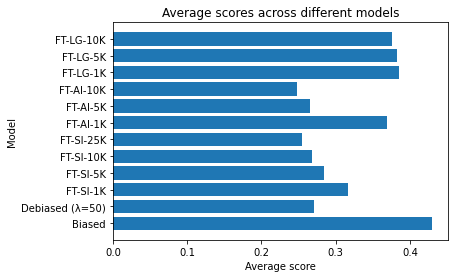

In [4]:
#Creating the bar chart 
plt.barh(model_names, averages) #color=['black', 'red', 'green', 
                                       #'blue', 'cyan', 'orange'])

#Adding the aesthetics
plt.title('Average scores across different models')
plt.xlabel('Average score')
plt.ylabel('Model');

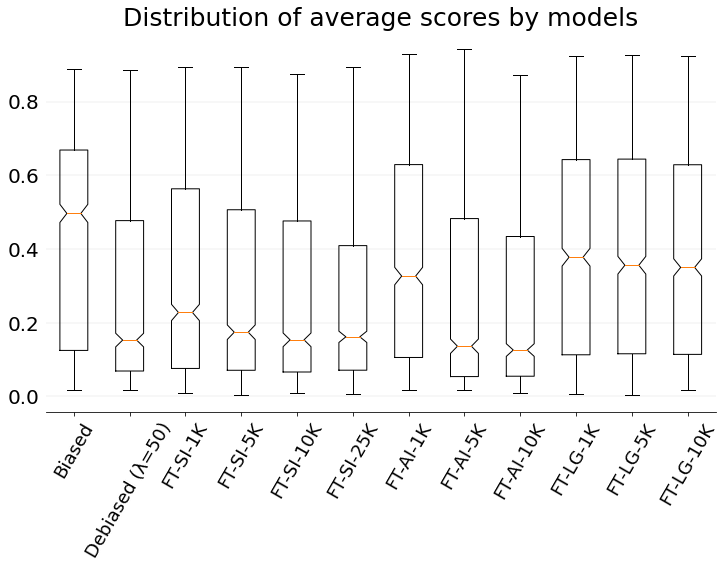

In [5]:
fig, ax = plt.subplots(figsize=(12, 7))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Distribution of average scores by models', fontsize=25)
# Create the boxplot
ax.boxplot([df['Average'] for df in dfs], labels=model_names, notch=True);
plt.yticks(fontsize=20)
plt.xticks(rotation=60, fontsize=18);

In [6]:
averages_df = pd.DataFrame({'Average score' : averages, 'Median score' : [np.median(df['Average']) for df in dfs]},
                           index=model_names)
averages_df * 100

,Average score,Median score
Biased,42.946986,49.631652
Debiased (λ=50),27.128000,15.262095
FT-SI-1K,31.710913,22.751516
FT-SI-5K,28.369413,17.398127
FT-SI-10K,26.839980,15.328974
FT-SI-25K,25.467348,16.143429
FT-AI-1K,36.921105,32.627242
FT-AI-5K,26.479624,13.594255
FT-AI-10K,24.854185,12.558451
FT-LG-1K,38.508325,37.750642


## Hypothesis test for comparing Debiased and FT (on 25K) models

Let's perform a hypothesis test for the difference between the population means of the XL debiased and XL fine-tuned models. Note that since we have a lot of data, the normality assumption of the two data distributions is not too important.

$H_0: \mu_1 = \mu_2 $ and $H_1: \mu_1 > \mu_2 $, where $\mu_1$ is the true population mean score for XL debiased and $\mu_2$ is the true population mean score for XL fine-tuned. 

Then, our t-statistic is: 
$$ T = \dfrac{\bar{x}_1 - \bar{x}_2}{\frac{\sqrt{{S_1}^2 + {S_2}^2}}{\sqrt{1199}}}$$

where $\bar{x}_1$ and $\bar{x}_2$ represent the sample means, and $S_1$ and $S_2$ represent the sample standard deviations of the data from the two models.

T has a t-distribution but since our sample size is so large, the distribution is esentially Normal. Hence, 

$$ T \sim \mathcal{N}(0,1)$$

In [13]:
x_1 , x_2 = np.mean(xl_debiased.iloc[: , -1].values) , np.mean(twentyfiveK.iloc[: , -1].values)
s_1 , s_2 = np.std(xl_debiased.iloc[: , -1].values) , np.std(twentyfiveK.iloc[: , -1].values)
t_stat = (x_1 - x_2) / np.sqrt((s_1**2 + s_2**2) / 1199)
print(t_stat)

1.7532789548805716


In [14]:
# Check with scipy
from scipy.stats import ttest_ind
ttest_ind(xl_debiased.iloc[: , -1].values, twentyfiveK.iloc[: , -1].values, equal_var=False, alternative='greater')

Ttest_indResult(statistic=1.7525476601856176, pvalue=0.03990421523921683)

Since the p-value is smaller than the significance level (let's assume a 5% significance level here), we can reject $H_0$. Thus, we are able to conclude that the mean score from our **25K fine-tuned GPT-2 XL model** is lower than the mean score from the debiased GPT-2 XL model. 

## Hypothesis test for comparing Debiased and FT (on 1K) models

Here, we repeat the process and we can see that we are unable to conclude that the mean score from our **1K fine-tuned GPT-2 XL model** is lower than the mean score from the debiased GPT-2 XL model.

As one could reasonably expect, fine-tuning on more data does seem to significantly improve the model's ability to produce less biased text. However, an interesting thing to note is that the model perplexity becomes worse and worse as we fine tune on more data. 

In [18]:
x_1 , x_2 = np.mean(xl_debiased.iloc[: , -1].values) , np.mean(tenK_logits.iloc[: , -1].values)
s_1 , s_2 = np.std(xl_debiased.iloc[: , -1].values) , np.std(tenK_logits.iloc[: , -1].values)
t_stat = (x_1 - x_2) / np.sqrt((s_1**2 + s_2**2) / 1199)
print(t_stat)

-10.188600188693531


In [15]:
x_1 , x_2 = np.mean(xl_debiased.iloc[: , -1].values) , np.mean(oneK.iloc[: , -1].values)
s_1 , s_2 = np.std(xl_debiased.iloc[: , -1].values) , np.std(oneK.iloc[: , -1].values)
t_stat = (x_1 - x_2) / np.sqrt((s_1**2 + s_2**2) / 1199)
print(t_stat)

-4.514588972292833


In [16]:
# Check with scipy
from scipy.stats import ttest_ind
ttest_ind(xl_debiased.iloc[: , -1].values, oneK.iloc[: , -1].values, equal_var=False, alternative='greater')

Ttest_indResult(statistic=-4.512705931972213, pvalue=0.9999966445504608)